# PSO effective-mass

20 November 2019

Another probe of the effective mass function, this time fitting to a small number of interlopers as subhalos.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from multiprocessing import Pool

from pso import PSOFit

from helpers import get_mass_back

In [2]:
## General settings ##
zl = .5
zs = 1.0

In [3]:
# zds = [.1,.2,.3,.4,.5,.6,.7,.8,.9] * 2
# seeds = [100] * 9 + [101] * 9
# zds = [.1,.2,.3, .4,.5,.6,.9]
# seeds = [100]*7
zds = [.5]*4
seeds = [101,102,103,104]
assert(len(zds) == len(seeds))
ilist = range(len(zds))
ncores = 4

In [4]:
def pso_fit_func(i, zd, seed):
    '''
    Just a helper function for multiprocessing.Pool
    '''
    print('running', i)
    ans = PSOFit(N=1, zd=zd, zl=zl, zs=zs,seed=seed, numiter=300)

    #pso_fit_list[i] = ans
    #ans = 'PSOFIT{}'.format(i)
    return i, ans

class CallbackList:
    def __init__(self,length):
        self.liszt = [None]*length
    
    def __repr__(self):
        return 'CallbackList'+self.liszt.__repr__()
    
    def callback(self, result):
        print('callback')
        assert(len(result) == 2)
        self.liszt[result[0]] = result[1]
        print('my list is now', self.liszt)

pso_fit_callback_list2 = CallbackList(len(zds))

In [5]:
%%time
with Pool(ncores) as pool:
    p_list = []
    for i, zd, seed in zip(ilist, zds, seeds):
        p = pool.apply_async(pso_fit_func, args=(i,zd, seed), callback=pso_fit_callback_list2.callback)
        p_list.append(p)

    for p in p_list:
        p.wait()
        
    for p in p_list:
        p.get()

running 0
running 3
running 1
running 2


2019-11-21 15:59:28,604 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/3002019-11-21 15:59:28,619 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
2019-11-21 15:59:28,620 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
2019-11-21 15:59:28,639 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|300/300, best_cost=6.47e-12
2019-11-21 16:09:54,019 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 6.465265169144044e-12, best pos: [-0.78320691 -4.13822067  1.04565605  7.62075411]
pyswarms.single.global_best: 100%|██████████|300/300, best_cost=1.37e-5


callback
my list is now [None, None, None, <pso.PSOFit object at 0x7fafb9fdf5f8>]


2019-11-21 16:09:54,307 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.3659085974476154e-05, best pos: [ -0.95167664  -3.99000081  -6.8868414  -13.76552268]


callback
my list is now [None, <pso.PSOFit object at 0x7fafb9fdf6d8>, None, <pso.PSOFit object at 0x7fafb9fdf5f8>]


pyswarms.single.global_best: 100%|██████████|300/300, best_cost=1.38e-8
2019-11-21 16:09:54,752 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.3805536457322654e-08, best pos: [-0.79286822 -4.12893495  6.02117029 11.6842041 ]
pyswarms.single.global_best: 100%|██████████|300/300, best_cost=7.45e-8
2019-11-21 16:09:54,874 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 7.454724863347442e-08, best pos: [ -0.77571229  -4.14402244 -12.99676067  -6.18757045]


callback
my list is now [None, <pso.PSOFit object at 0x7fafb9fdf6d8>, <pso.PSOFit object at 0x7fafb9fdf7b8>, <pso.PSOFit object at 0x7fafb9fdf5f8>]
callback
my list is now [<pso.PSOFit object at 0x7fafb9fdfa20>, <pso.PSOFit object at 0x7fafb9fdf6d8>, <pso.PSOFit object at 0x7fafb9fdf7b8>, <pso.PSOFit object at 0x7fafb9fdf5f8>]
CPU times: user 2.32 s, sys: 904 ms, total: 3.22 s
Wall time: 10min 26s


With `n_particles = 32`:
* 3 at a time : 5min14 (300 iterations, N=2)
* 2 at a time : 4min2 (300 iterations, N=2)
* 7 : 9min10 (300 iterations, N=1)
* 1 : 3min2 (300 iterations, N=1)
* 4 : 1min50 (100 iterations, N=1)

In [6]:
pso_fit_list = pso_fit_callback_list2.liszt

Text(0, 0.5, 'rsang')

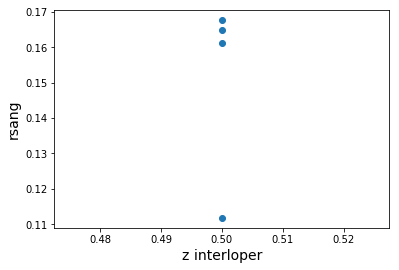

In [7]:
plt.plot(zds, [10**pf.pos[0] for pf in pso_fit_list], 'o')
#plt.axhline(y=2, color='r', linestyle='-')
plt.xlabel('z interloper', size=14)
plt.ylabel('rsang', size=14)

Text(0, 0.5, 'alphars')

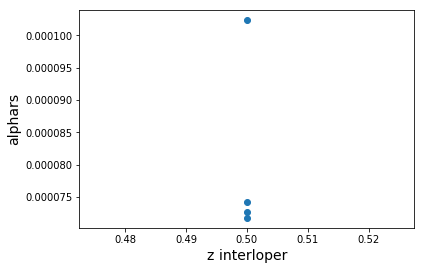

In [8]:
plt.plot(zds, [10**pf.pos[1] for pf in pso_fit_list], 'o')
#plt.axhline(y=3e-4, color='r', linestyle='-')
plt.xlabel('z interloper', size=14)
plt.ylabel('alphars', size=14)

In [9]:
masses_sketchy = np.array([get_mass_back(10**pf.pos[0], 10**pf.pos[1], zd, zs) for zd, pf in zip(zds, pso_fit_list)])
# todo check that this is the correct mass formula...

[1.02142785 0.64759073 0.9771997  1.00004656]


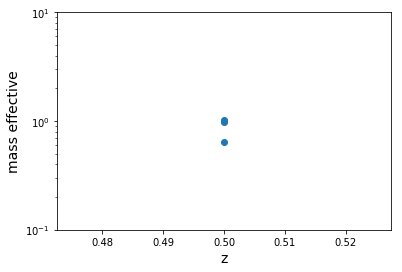

In [20]:
plt.plot(zds,masses_sketchy/1e7, 'o')
plt.xlabel('z', size=14)
plt.ylabel('mass effective', size=14)
#plt.ylim(0,3)
plt.gca().set_yscale('log')
plt.ylim(1e-1,1e1)

print(masses_sketchy/1e7)

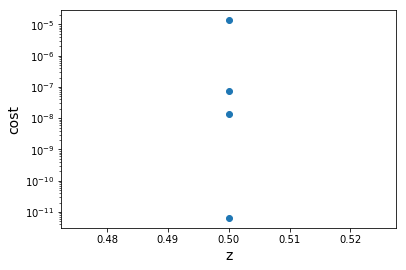

In [12]:
plt.plot(zds,[pf.cost for pf in pso_fit_list], 'o')
plt.xlabel('z', size=14)
plt.ylabel('cost', size=14)
plt.gca().set_yscale('log')

zd 0.5 (7.454724863347442e-08)


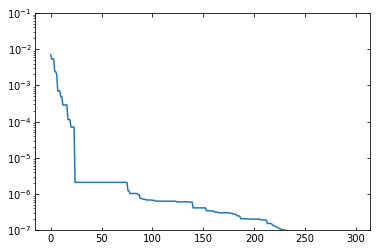

zd 0.5 (1.3659085974476154e-05)


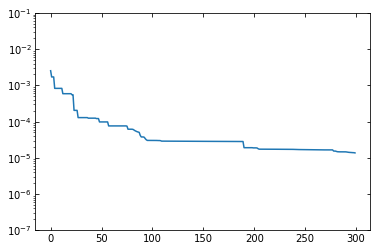

zd 0.5 (1.3805536457322654e-08)


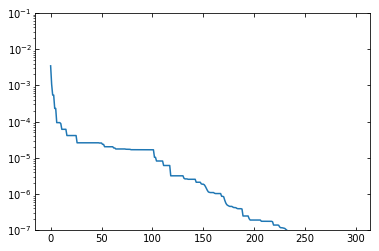

zd 0.5 (6.465265169144044e-12)


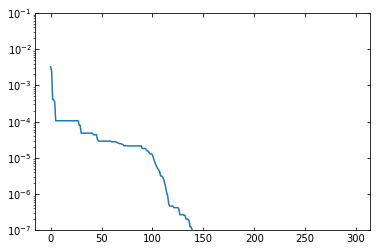

In [13]:
for zd, pso_fit in zip(zds, pso_fit_list):
    print('zd',zd, '({})'.format(pso_fit.cost))
    plt.plot(pso_fit.cost_history)
    plt.gca().set_yscale('log')
    plt.gca().tick_params(right=True, top=True, direction='in')
    plt.ylim(1e-7,.1)
    plt.show()

cost 7.454724863347442e-08
[-0.7757122882224959, -4.144022442448621, -12.996760670143876, -6.187570451004265]
[0.1647295558763404, 7.274484653964194e-05, array(-12.97855142), array(-6.17386866)]


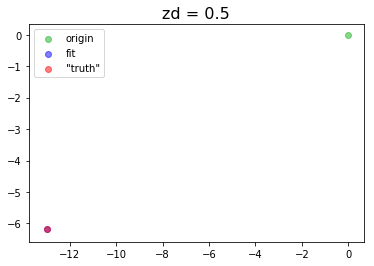

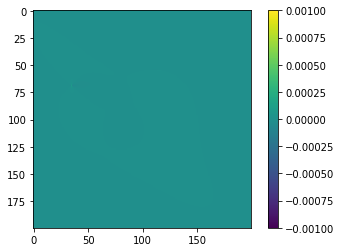

cost 1.3659085974476154e-05
[-0.9516766420694426, -3.9900008077086584, -6.886841397535406, -13.765522681543414]
[0.1647295558763404, 7.274484653964194e-05, array(-6.9340267), array(-13.81998219)]


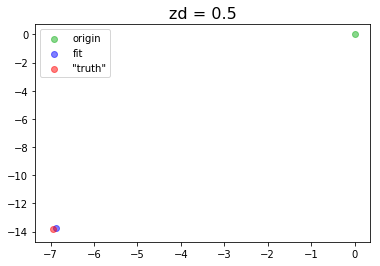

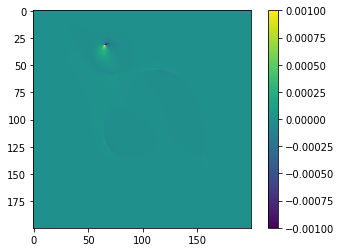

cost 1.3805536457322654e-08
[-0.7928682206167945, -4.1289349459907445, 6.021170286408553, 11.684204101260963]
[0.1647295558763404, 7.274484653964194e-05, array(6.02631344), array(11.68452089)]


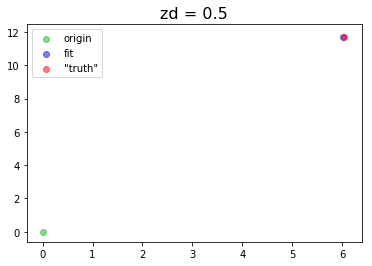

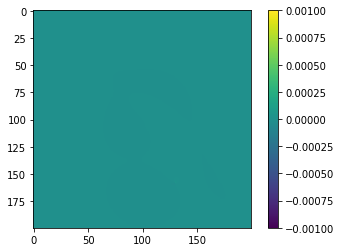

cost 6.465265169144044e-12
[-0.7832069117578476, -4.138220671163116, 1.0456560507974952, 7.620754105830639]
[0.1647295558763404, 7.274484653964194e-05, array(1.04561118), array(7.62069203)]


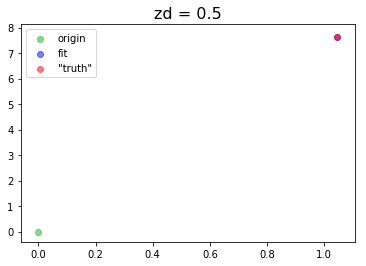

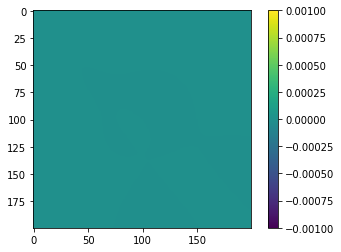

In [14]:
vmin = -.001; vmax=.001
for zd,pf in zip(zds, pso_fit_list):
    nfw_idx = 2 if zl < zd else 1 # index of first nfw lens
    almost_truth_args = ([pf.image_obj.rsang, pf.image_obj.alphars]
                     +[pf.image_obj.kwargs_lens[nfw_idx+i]['center_x'] for i in range(pf.N)]
                     +[pf.image_obj.kwargs_lens[nfw_idx+i]['center_y'] for i in range(pf.N)])
    print('cost', pf.cost)
    print(list(pf.pos))
    print(list(almost_truth_args))
    
    plt.scatter([0],[0], color='xkcd:green', label='origin', alpha=.5)
    for idx in range(2,2+pf.N):
        plt.scatter(pf.pos[idx],pf.pos[idx+pf.N], color='blue', alpha=.5,
                    label='fit' if idx==2 else None)
        plt.scatter(almost_truth_args[idx], almost_truth_args[idx+pf.N], color='red', alpha=.5,
                    label='"truth"' if idx==2 else None)
    plt.legend()
    plt.title('zd = {}'.format(zd),fontsize=16)
    plt.show()
    
    masked = pf.image-pf.pso_img
    masked[100][100] = 0
    plt.imshow(masked, vmin=vmin, vmax=vmax); plt.colorbar()
    plt.show()

In [15]:
almost_truth_args

[0.1647295558763404,
 7.274484653964194e-05,
 array(1.04561118),
 array(7.62069203)]

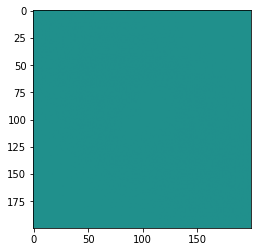

In [16]:
plt.imshow(pso_fit.almost_truth_img - pso_fit.image, vmin=vmin, vmax=vmax)

In [17]:
get_mass_back(almost_truth_args[0], almost_truth_args[1], .5, 1)

10000000.0

In [18]:
# import pickle
# with open('pso_fit_list2.p', 'wb') as f:
#     pickle.dump(pso_fit_list, f)

## Old cells...

In [19]:
def partition(liszt, n):
    ''' Divides a list `liszt` into `n` nearly equal parts 
    (useful for pooling)'''
    lenliszt = len(liszt)
    short = lenliszt//n # how long is a short part
    nlong = lenliszt - short*n # remainder after integer division
    
    # list of lengths
    length_list = [short]*(n-nlong) + [short+1]*nlong
    
    ans = []
    counter = 0
    for length in length_list:
        ans.append(liszt[counter:counter+length])
        counter += length
        
    return ans    